<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-17 08:57:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.4MB/s    in 2.2s    

2025-05-17 08:57:23 (68.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


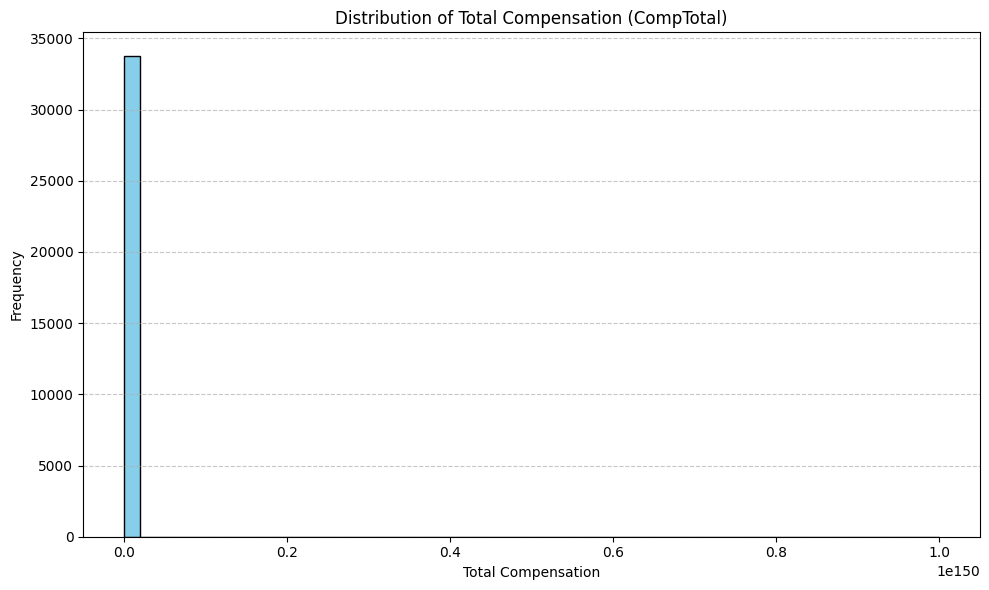

In [19]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query CompTotal from the main table
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
comp_df = pd.read_sql_query(query, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Plot histogram of CompTotal
plt.figure(figsize=(10, 6))
plt.hist(comp_df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




**Box Plots**

Plot a box plot of Age.


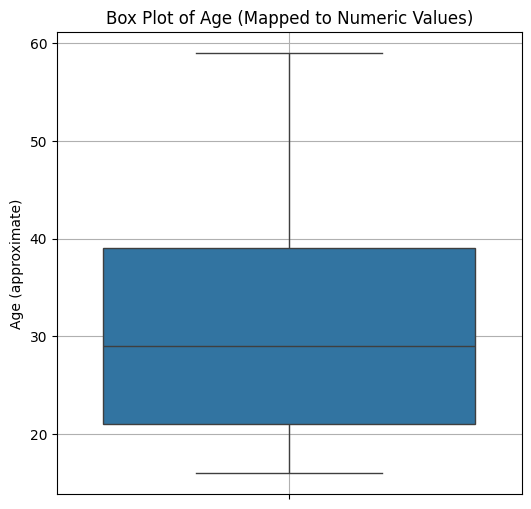

In [22]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Read the Age column
df = pd.read_sql_query("SELECT Age FROM main WHERE Age IS NOT NULL", conn)

# Close the connection
conn.close()

# Mapping age ranges to numeric values (approximate midpoint of each range)
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years old or older": 70,
    "Prefer not to say": None
}

# Apply the mapping
df['Age_num'] = df['Age'].map(age_map)

# Drop rows where Age_num is None
df_clean = df.dropna(subset=['Age_num'])

# Plot box plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_clean['Age_num'])
plt.title("Box Plot of Age (Mapped to Numeric Values)")
plt.ylabel("Age (approximate)")
plt.grid(True)
plt.show()





### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


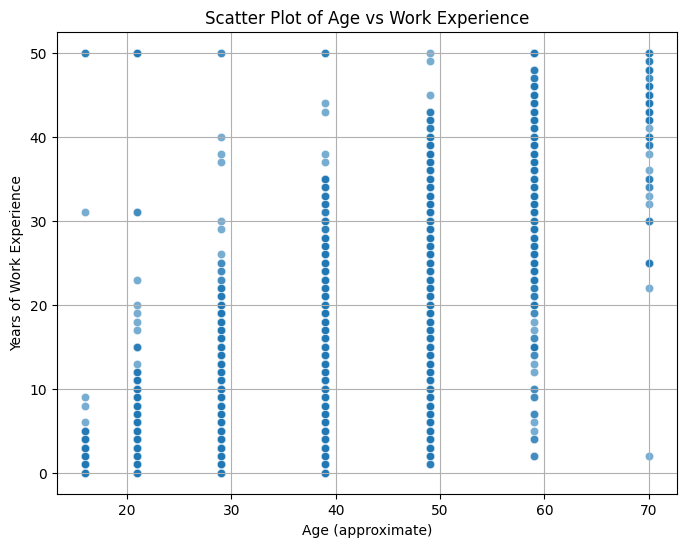

In [23]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Read Age and WorkExp columns
df = pd.read_sql_query("SELECT Age, WorkExp FROM main", conn)

# Close the connection
conn.close()

# Map Age categories to approximate numeric values
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70,
    "Prefer not to say": None
}
df['Age_num'] = df['Age'].map(age_map)

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['Age_num', 'WorkExp'])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_num', y='WorkExp', data=df_clean, alpha=0.6)
plt.title("Scatter Plot of Age vs Work Experience")
plt.xlabel("Age (approximate)")
plt.ylabel("Years of Work Experience")
plt.grid(True)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


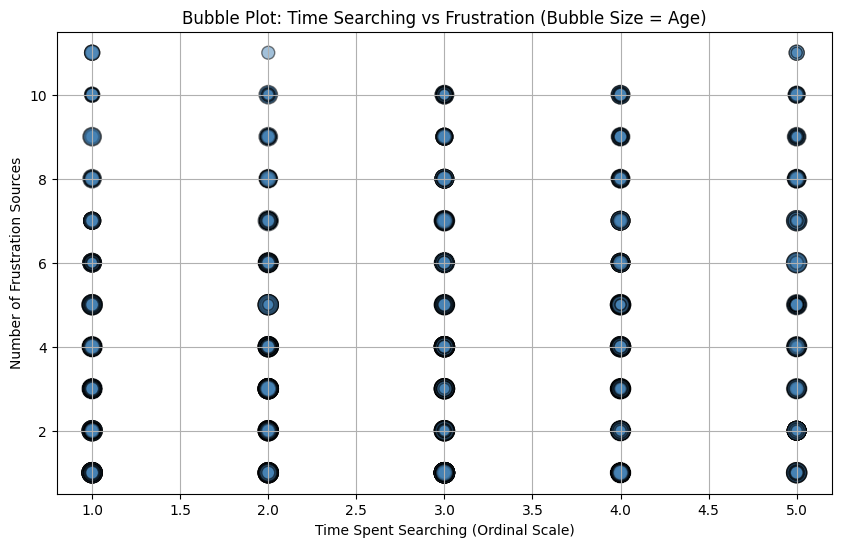

In [27]:
#Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Load data from SQLite
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, TimeSearching, Frustration FROM main", conn)
conn.close()

# Step 2: Map Age to numeric estimates
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70,
    "Prefer not to say": None
}
df["AgeNum"] = df["Age"].map(age_map)

# Step 3: Map TimeSearching to ordinal scale
search_map = {
    "Less than 15 minutes a day": 1,
    "15-30 minutes a day": 2,
    "30-60 minutes a day": 3,
    "60-120 minutes a day": 4,
    "Over 120 minutes a day": 5
}
df["SearchOrdinal"] = df["TimeSearching"].map(search_map)

# Step 4: Count the number of frustration factors selected
df["FrustrationCount"] = df["Frustration"].apply(
    lambda x: len(str(x).split(';')) if pd.notnull(x) else None
)

# Step 5: Drop rows with missing required data
df_clean = df.dropna(subset=["SearchOrdinal", "FrustrationCount", "AgeNum"])

# Step 6: Bubble Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean["SearchOrdinal"],
    df_clean["FrustrationCount"],
    s=df_clean["AgeNum"] * 3,
    alpha=0.5,
    c='steelblue',
    edgecolors='black'
)
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble Size = Age)")
plt.xlabel("Time Spent Searching (Ordinal Scale)")
plt.ylabel("Number of Frustration Sources")
plt.grid(True)
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


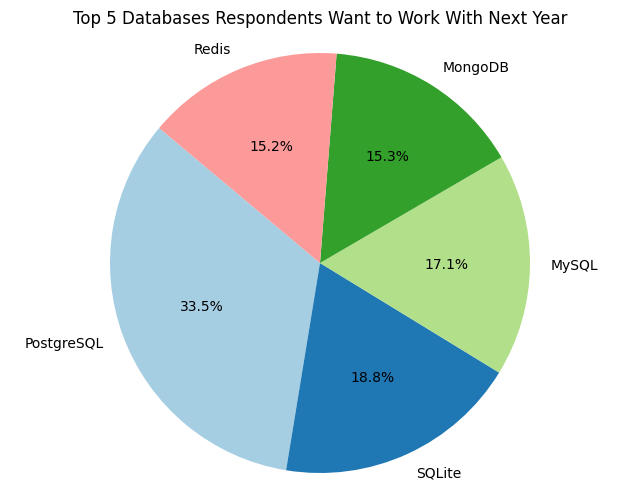

In [28]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from collections import Counter

# Step 1: Load data from SQLite
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT DatabaseWantToWorkWith FROM main", conn)
conn.close()

# Step 2: Split and count database preferences
all_dbs = df['DatabaseWantToWorkWith'].dropna().str.split(';').sum()
db_counts = Counter(all_dbs)

# Step 3: Get top 5 databases
top_5 = db_counts.most_common(5)
labels, sizes = zip(*top_5)

# Step 4: Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Databases Respondents Want to Work With Next Year")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


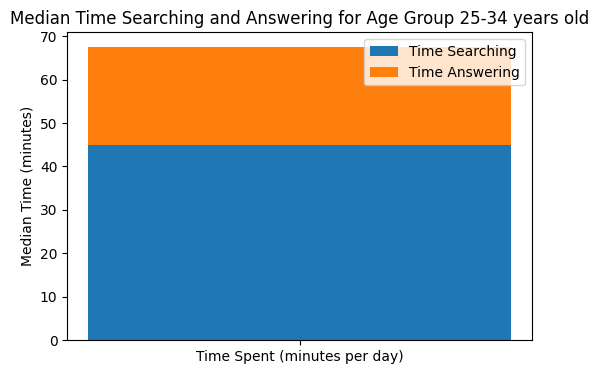

In [29]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect and load relevant columns from SQLite
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, TimeSearching, TimeAnswering FROM main", conn)
conn.close()

# Filter for age group "25-34 years old" (closest to 30-35)
age_group = "25-34 years old"
df_age = df[df['Age'] == age_group].copy()

# Define mapping for ordinal time categories to minutes (approximate midpoints)
ordinal_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}

# Map the ordinal columns to numeric values
df_age['TimeSearching_num'] = df_age['TimeSearching'].map(ordinal_map)
df_age['TimeAnswering_num'] = df_age['TimeAnswering'].map(ordinal_map)

# Calculate medians (ignoring NaNs)
median_searching = df_age['TimeSearching_num'].median()
median_answering = df_age['TimeAnswering_num'].median()

# Prepare data for stacked bar plot
labels = ['Time Spent (minutes per day)']
searching_vals = [median_searching]
answering_vals = [median_answering]

# Plot
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(labels, searching_vals, label='Time Searching')
ax.bar(labels, answering_vals, bottom=searching_vals, label='Time Answering')

ax.set_ylabel('Median Time (minutes)')
ax.set_title(f'Median Time Searching and Answering for Age Group {age_group}')
ax.legend()

plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


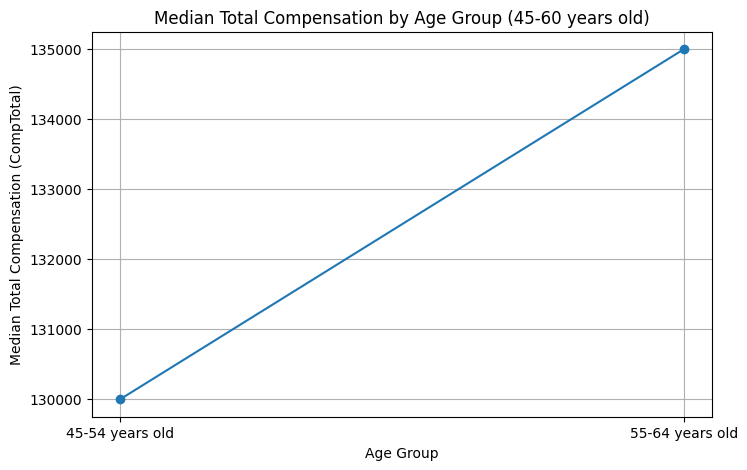

In [30]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite and load relevant columns
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)
conn.close()

# Define age groups of interest
age_groups = ["45-54 years old", "55-64 years old"]

# Filter dataframe for these age groups
df_filtered = df[df['Age'].isin(age_groups)].copy()

# Calculate median CompTotal per age group, ignoring NaNs
median_comp = df_filtered.groupby('Age')['CompTotal'].median().reindex(age_groups)

# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(median_comp.index, median_comp.values, marker='o', linestyle='-')
plt.title('Median Total Compensation by Age Group (45-60 years old)')
plt.xlabel('Age Group')
plt.ylabel('Median Total Compensation (CompTotal)')
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
